# Spotify Analysis: Study of song factors and the positive correlation to streaming

## Members
- Joey Beightol
- Ryan Lucero
- Matthew Parker

## Dataset and Motivation
This dataset is made up of the 943 most famous songs on Spotify for 2023 and was collected by Kaggle user Nidula Elgiriyewithana (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). The data was collected for exploratory analysis into patterns that may effect overall streams, popularity on specific platforms, trends in musical attributes or preferences etc. 

## Song Feature Details
The data set includes 24 different features:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song



## Objective
Our goal is to analyze what combination of surveyed factors (danceability, valence, energy, acousticness, instrumentalness, liveness, speechiness, etc.) are most positively correlated with streams for a song on Spotify


## Literature Review
Researchers at Carleton University concluded that song features to do not directly correlate to its popluarity, suggesting that contextual factors instead of musical features are stronger indicators of a songs success. Their study also suggestes that elements affecting song popularity change over time (https://newsroom.carleton.ca/story/big-data-predict-song-popularity/).

Researchers at Stanford University came to a similar conclusion. Using a different set of factors and a dataset of one milllion songs dating back to 2011, they found that sonic features of a song were far less predictive of ti's popularity than its metadata features (https://cs229.stanford.edu/proj2015/140_report.pdf).

# Data Wrangling

## Import Libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

## Load in Data

In [186]:
# Load data from a CSV file into a DataFrame
spotifyDF = pd.read_csv('spotify-2023.csv', encoding='latin-1')
spotifyLargeDF = pd.read_csv('spotify_large.csv', encoding='latin-1')

# Display the first few rows of the DataFrame
display(spotifyDF.head())

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

### Clean the data

In [187]:
#Removing any types that are not a number in streams column
spotifyDF['streams'] = pd.to_numeric(spotifyDF['streams'], errors='coerce')
spotifyDF = spotifyDF.dropna(subset=['streams'])
spotifyDF= spotifyDF.reset_index(drop=True)
spotifyDF.dtypes


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

### Take look at data

In [188]:
#describe the dataframe
spotifyDF.describe()

artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000  1.416362e+08   
50%             2216.500000           3.000000  2.905309e+08   
75%             5573.750000          16.000000  6.738690e+08   
max            52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_charts         bpm  \
count          952.000000       952.000000        952.000000  952.000000   
mean            67.866597        51.963235          2.669118  122.553571   
std             86.470591        50.628850          6.038152   28.069601   
min              0.000000         0.000000          0.000000   65.000000   
25%             13.000000         7.000000          0.000000   99.750000   
50%             34.000000        38.500000          0.000000  121.000000   
75%             88.000000        87.000000          2.000000  140.250000   
max            672.000000       275.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      952.000000  952.000000  952.000000      952.000000   
mean        66.984244   51.406513   64.274160       27.078782   
std         14.631282   23.480526   16.558517       26.001599   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   32.000000   53.000000        6.000000   
50%         69.000000   51.000000   66.000000       18.000000   
75%         78.000000   70.000000   77.000000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          952.000000  952.000000     952.000000  
mean             1.582983   18.214286      10.138655  
std              8.414064   13.718374       9.915399  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      11.000000  
max             91.000000   97.000000      64.000000

In [189]:
#Find all null values
spotifyDF.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [190]:
#Duplication
spotifyDF.duplicated().sum()

0

In [191]:
#Drop all na values
spotifyDF.replace('None', np.nan, inplace=True)
spotifyDF_cleaned = spotifyDF.dropna(subset=['key'])
spotifyDF_cleaned.isna().sum()



track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

## Visualizing Data

### Artist Streams

In [192]:
#artist streams
artistStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='artist(s)_name', aggfunc='sum')
display(artistStreams.sort_values(by='streams',ascending=False).head())


streams
artist(s)_name              
Ed Sheeran      1.390895e+10
Taylor Swift    1.185115e+10
The Weeknd      1.006933e+10
Bad Bunny       8.582384e+09
Harry Styles    8.546679e+09

### Month Realeased Streams

Total Streams


streams
released_month              
1               8.878917e+10
5               4.815132e+10
9               3.934781e+10
11              3.864161e+10
10              3.774078e+10

Average Streams


streams
released_month              
9               7.715258e+08
1               7.399097e+08
8               6.237728e+08
10              5.718300e+08
11              5.600234e+08

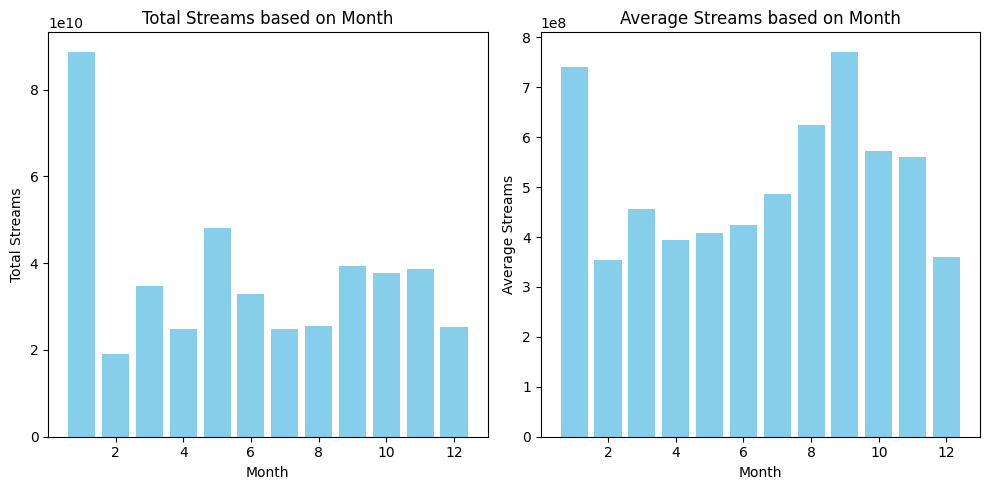

In [193]:
#Total streams based on danceability
monthlyStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='released_month', aggfunc='sum')
print('Total Streams')
display(monthlyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
monthlyStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='released_month', aggfunc='mean')
print('Average Streams')
display(monthlyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Month
axs[0].bar(monthlyStreams.index, monthlyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Month')
#Average streams vs. Month
axs[1].bar(monthlyStreamAvg.index, monthlyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Month')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### BPM and Streams

Total Streams


streams
bpm              
120  1.451305e+10
110  1.280398e+10
124  1.172844e+10
95   1.120815e+10
150  1.071588e+10

Average Streams


streams
bpm              
171  2.409867e+09
179  1.735442e+09
186  1.718833e+09
173  1.269461e+09
181  1.256881e+09

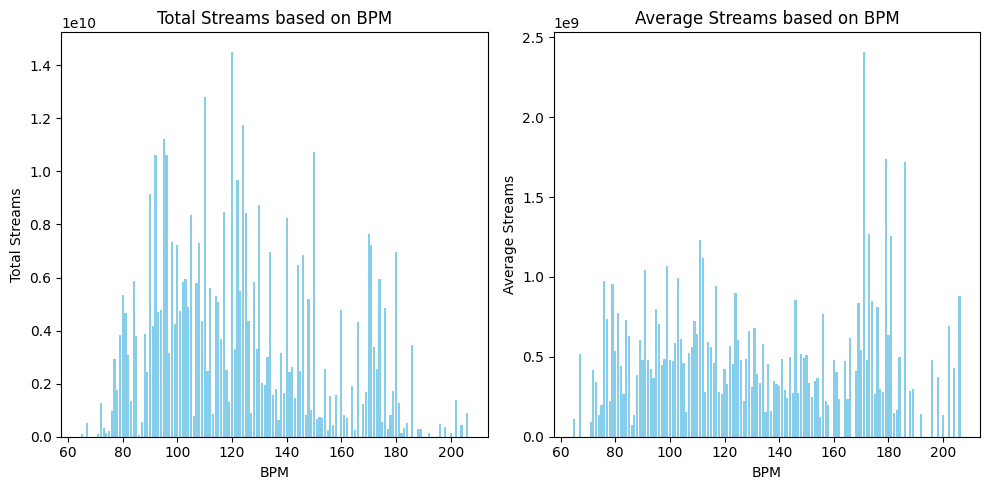

In [194]:
#Total streams based on BPM
bpmStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='bpm', aggfunc='sum')
print('Total Streams')
display(bpmStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on BPM
bpmStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='bpm', aggfunc='mean')
print('Average Streams')
display(bpmStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. BPM
axs[0].bar(bpmStreams.index, bpmStreams['streams'], color='skyblue')
axs[0].set_xlabel('BPM')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on BPM')
#Average streams vs. BPM
axs[1].bar(bpmStreamAvg.index, bpmStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('BPM')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on BPM')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Key and Streams

Total Streams


streams
key              
C#   7.251363e+10
G    4.344954e+10
G#   4.339898e+10
D    4.289157e+10
B    4.206718e+10

Average Streams


streams
key              
C#   6.042802e+08
E    5.774972e+08
D#   5.530365e+08
A#   5.524754e+08
D    5.295256e+08

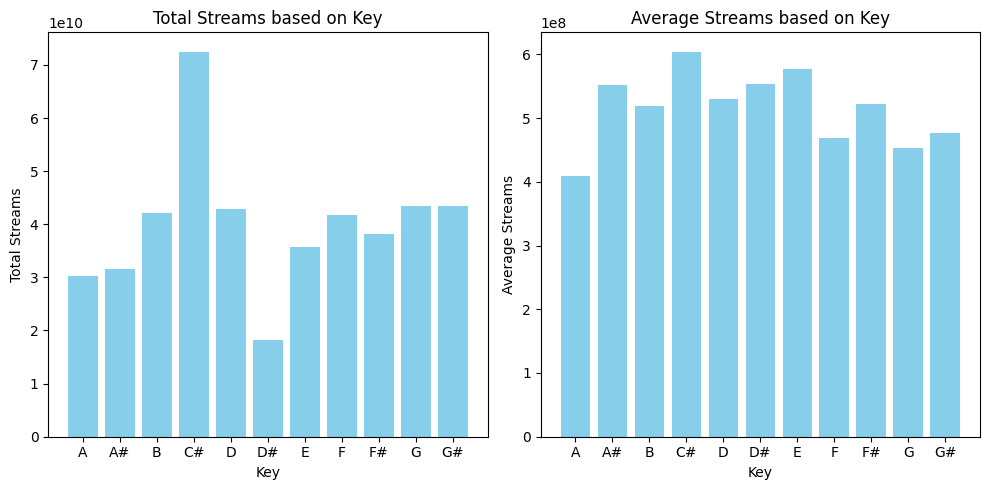

In [195]:
#Total streams based on Key
keyStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='key', aggfunc='sum')
print('Total Streams')
display(keyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Key
keyStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='key', aggfunc='mean')
print('Average Streams')
display(keyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Key
axs[0].bar(keyStreams.index, keyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Key')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Key')
#Average streams vs. Key
axs[1].bar(keyStreamAvg.index, keyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Key')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Key')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



### Danceability Vs. Streams

Total Streams


streams
danceability_%              
70              1.773929e+10
61              1.652097e+10
77              1.551982e+10
59              1.502133e+10
74              1.397458e+10

Average Streams


streams
danceability_%              
35              1.258126e+09
29              1.230856e+09
45              1.021795e+09
32              9.952062e+08
61              9.718217e+08

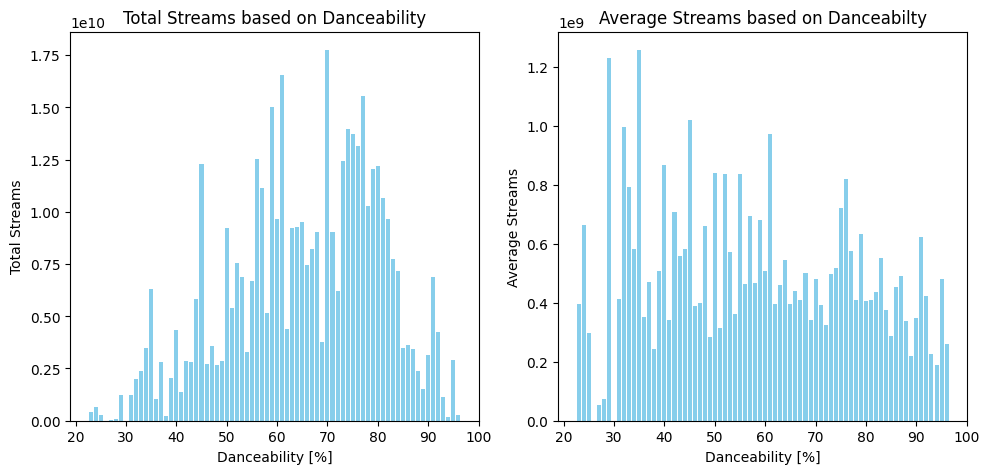

In [196]:
#Total streams based on danceability
danceStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='danceability_%', aggfunc='sum')
print('Total Streams')
display(danceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
danceStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='danceability_%', aggfunc='mean')
print('Average Streams')
display(danceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. danceability
axs[0].bar(danceStreams.index, danceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Danceability [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Danceability')
#Average streams vs. danceability
axs[1].bar(danceStreamAvg.index, danceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Danceability [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Danceabilty')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams based on Valence %

Total Streams


streams
valence_%              
24         1.301216e+10
53         1.181261e+10
42         1.015990e+10
40         9.672268e+09
45         9.360428e+09

Average Streams


streams
valence_%              
93         1.417999e+09
12         1.269047e+09
95         1.113839e+09
21         1.020248e+09
38         1.005746e+09

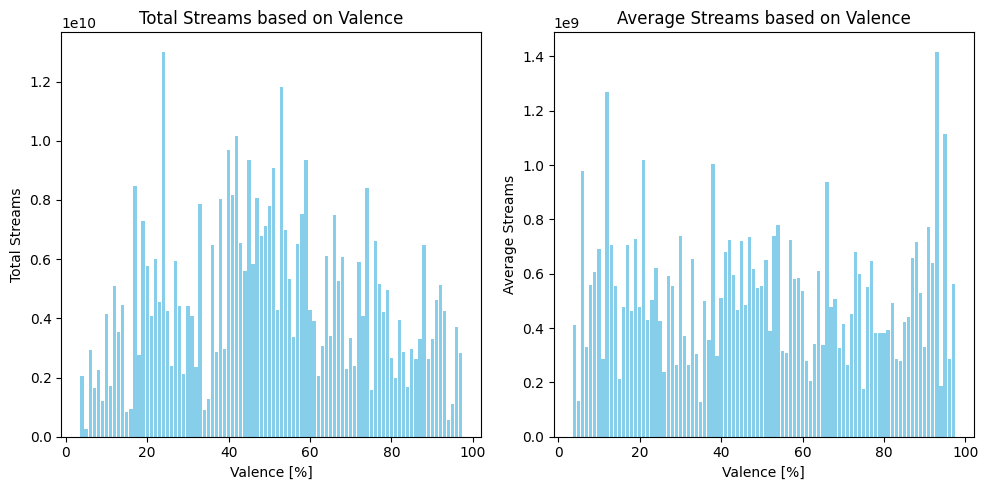

In [197]:
#Total streams based on Valence
valenceStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='valence_%', aggfunc='sum')
print('Total Streams')
display(valenceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Valence
valenceStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='valence_%', aggfunc='mean')
print('Average Streams')
display(valenceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Valence
axs[0].bar(valenceStreams.index, valenceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Valence [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Valence')
#Average streams vs. Valence
axs[1].bar(valenceStreamAvg.index, valenceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Valence [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Valence')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams based on Energy

Total Streams


streams
energy_%              
66        1.621373e+10
52        1.427733e+10
73        1.363552e+10
80        1.351592e+10
65        1.321418e+10

Average Streams


streams
energy_%              
93        1.305763e+09
26        1.098487e+09
30        9.077186e+08
52        8.923330e+08
38        8.869762e+08

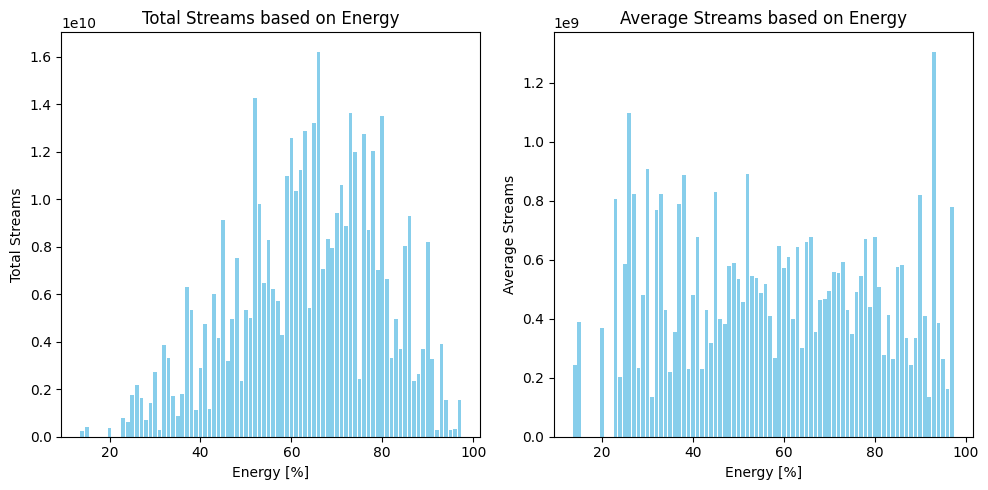

In [198]:
#Total streams based on Energy
energyStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='energy_%', aggfunc='sum')
print('Total Streams')
display(energyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Energy
energyStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='energy_%', aggfunc='mean')
print('Average Streams')
display(energyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Energy
axs[0].bar(energyStreams.index, energyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Energy [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Energy')
#Average streams vs. Energy
axs[1].bar(energyStreamAvg.index, energyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Energy [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Energy')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


### Streams Based on Accousticness

Total Streams


streams
acousticness_%              
0               3.091967e+10
1               3.004232e+10
4               2.158430e+10
2               1.883107e+10
3               1.754107e+10

Average Streams


streams
acousticness_%              
58              1.662174e+09
63              1.521946e+09
54              1.424959e+09
97              1.410089e+09
93              1.240064e+09

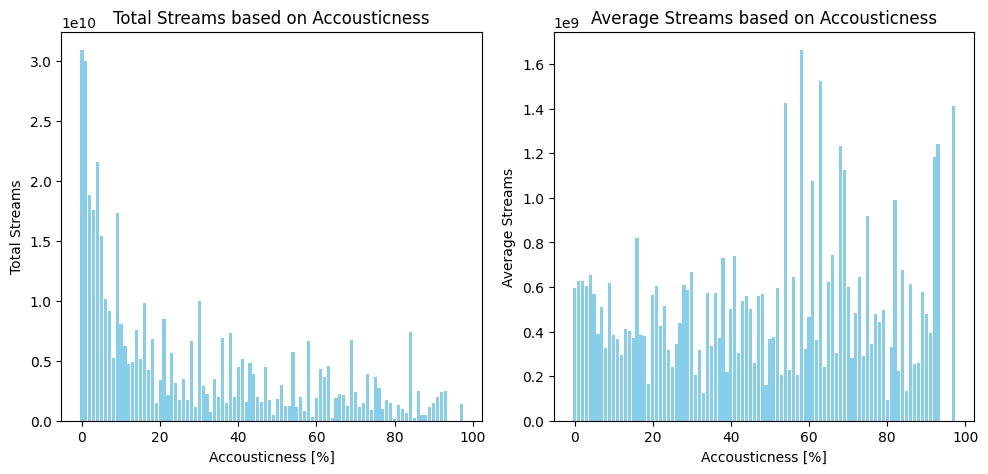

In [199]:
#Total streams based on Accousticness
accStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='acousticness_%', aggfunc='sum')
print('Total Streams')
display(accStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Accousticness
accStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='acousticness_%', aggfunc='mean')
print('Average Streams')
display(accStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Accousticness
axs[0].bar(accStreams.index, accStreams['streams'], color='skyblue')
axs[0].set_xlabel('Accousticness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Accousticness')
#Average streams vs. Accousticness
axs[1].bar(accStreamAvg.index, accStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Accousticness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Accousticness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Streams based on liveness

Total Streams


streams
liveness_%              
9           5.156334e+10
11          4.353000e+10
10          4.059615e+10
12          2.788289e+10
8           2.638670e+10

Average Streams


streams
liveness_%              
64          1.385757e+09
46          8.710787e+08
45          8.440645e+08
42          8.433009e+08
4           8.313533e+08

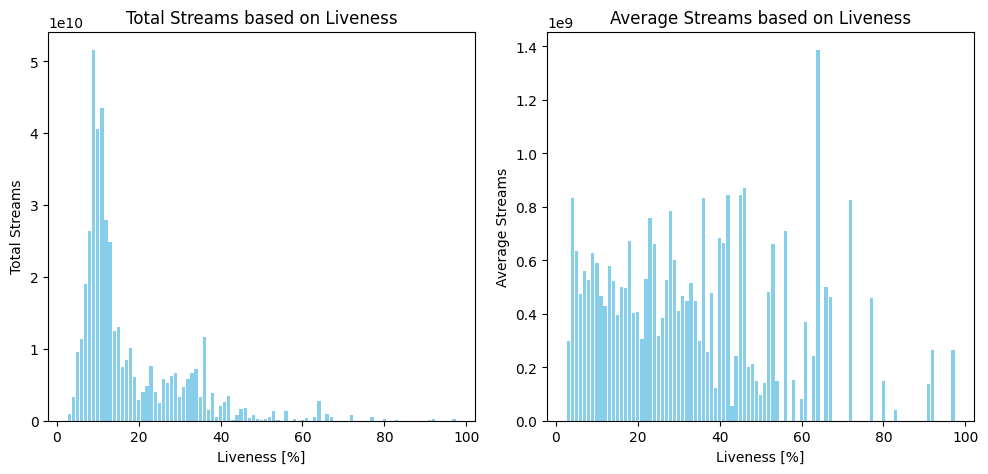

In [200]:
#Total streams based on liveness
livenessStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='liveness_%', aggfunc='sum')
print('Total Streams')
display(livenessStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on liveness
livenessStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='liveness_%', aggfunc='mean')
print('Average Streams')
display(livenessStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. liveness
axs[0].bar(livenessStreams.index, livenessStreams['streams'], color='skyblue')
axs[0].set_xlabel('Liveness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Liveness')
#Average streams vs. liveness
axs[1].bar(livenessStreamAvg.index, livenessStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Liveness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Liveness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

### Streams based on Speachiness

Total Streams


streams
speechiness_%              
3              8.215348e+10
4              7.595194e+10
5              6.434998e+10
6              3.451057e+10
8              2.485985e+10

Average Streams


streams
speechiness_%              
2              1.468183e+09
44             1.155506e+09
37             7.983765e+08
28             7.914525e+08
18             7.494015e+08

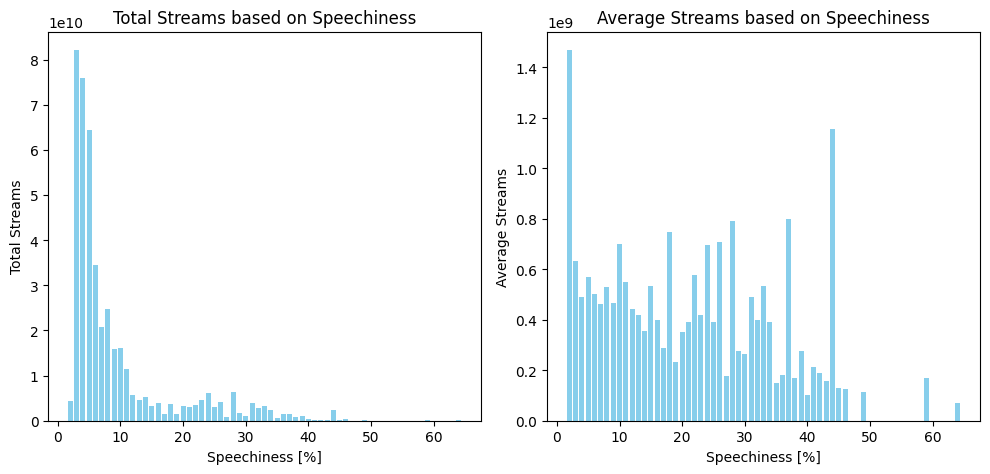

In [201]:
#Total streams based on speechiness
speechStreams = pd.pivot_table(spotifyDF_cleaned, values='streams', index='speechiness_%', aggfunc='sum')
print('Total Streams')
display(speechStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on speechiness
speechStreamAvg = pd.pivot_table(spotifyDF_cleaned, values='streams', index='speechiness_%', aggfunc='mean')
print('Average Streams')
display(speechStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. speechiness
axs[0].bar(speechStreams.index, speechStreams['streams'], color='skyblue')
axs[0].set_xlabel('Speechiness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Speechiness')
#Average streams vs. speechiness
axs[1].bar(speechStreamAvg.index, speechStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Speechiness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Speechiness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

## Analysis of Data: Correlation

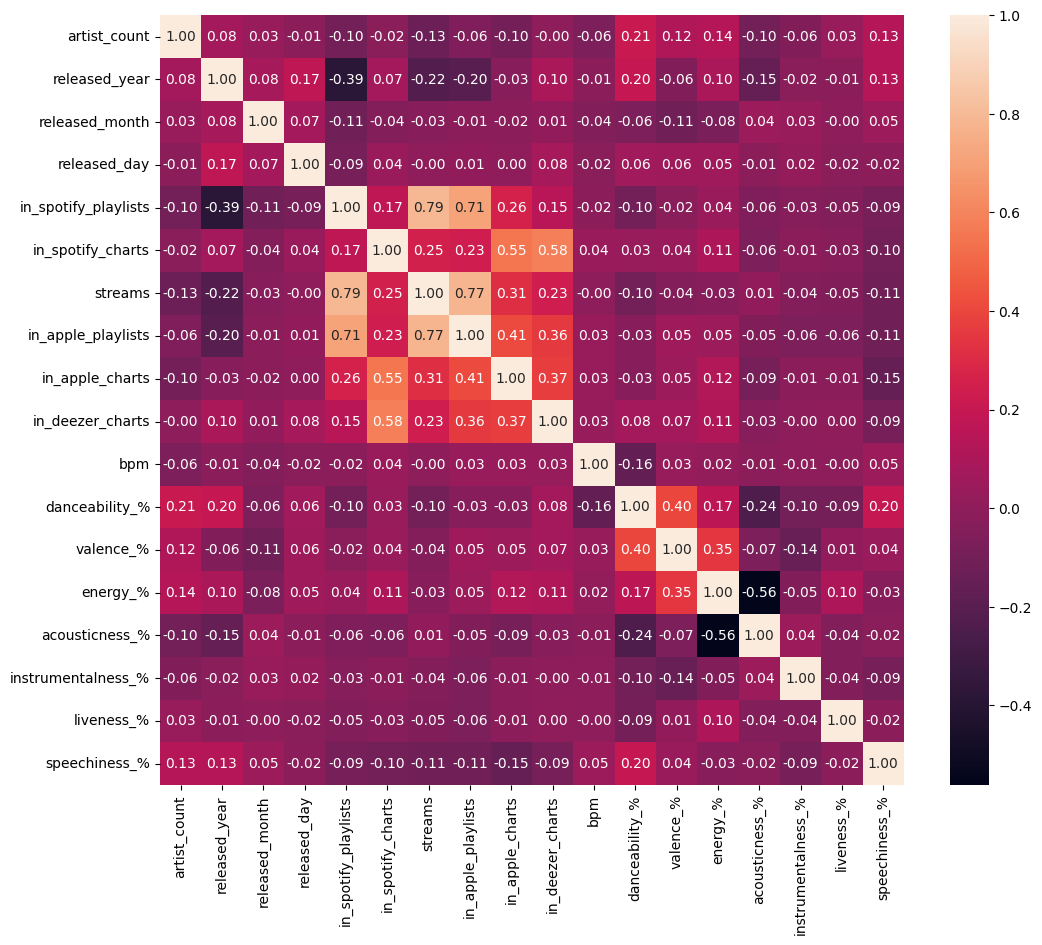

In [202]:
#Create new df for only number columns
numeric_columns = spotifyDF_cleaned.select_dtypes(include='number').columns
#Create a new DataFrame with only numeric columns
spotifyNumericDF = spotifyDF_cleaned[numeric_columns]

# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(spotifyNumericDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

## Analysis of Data: Linearity

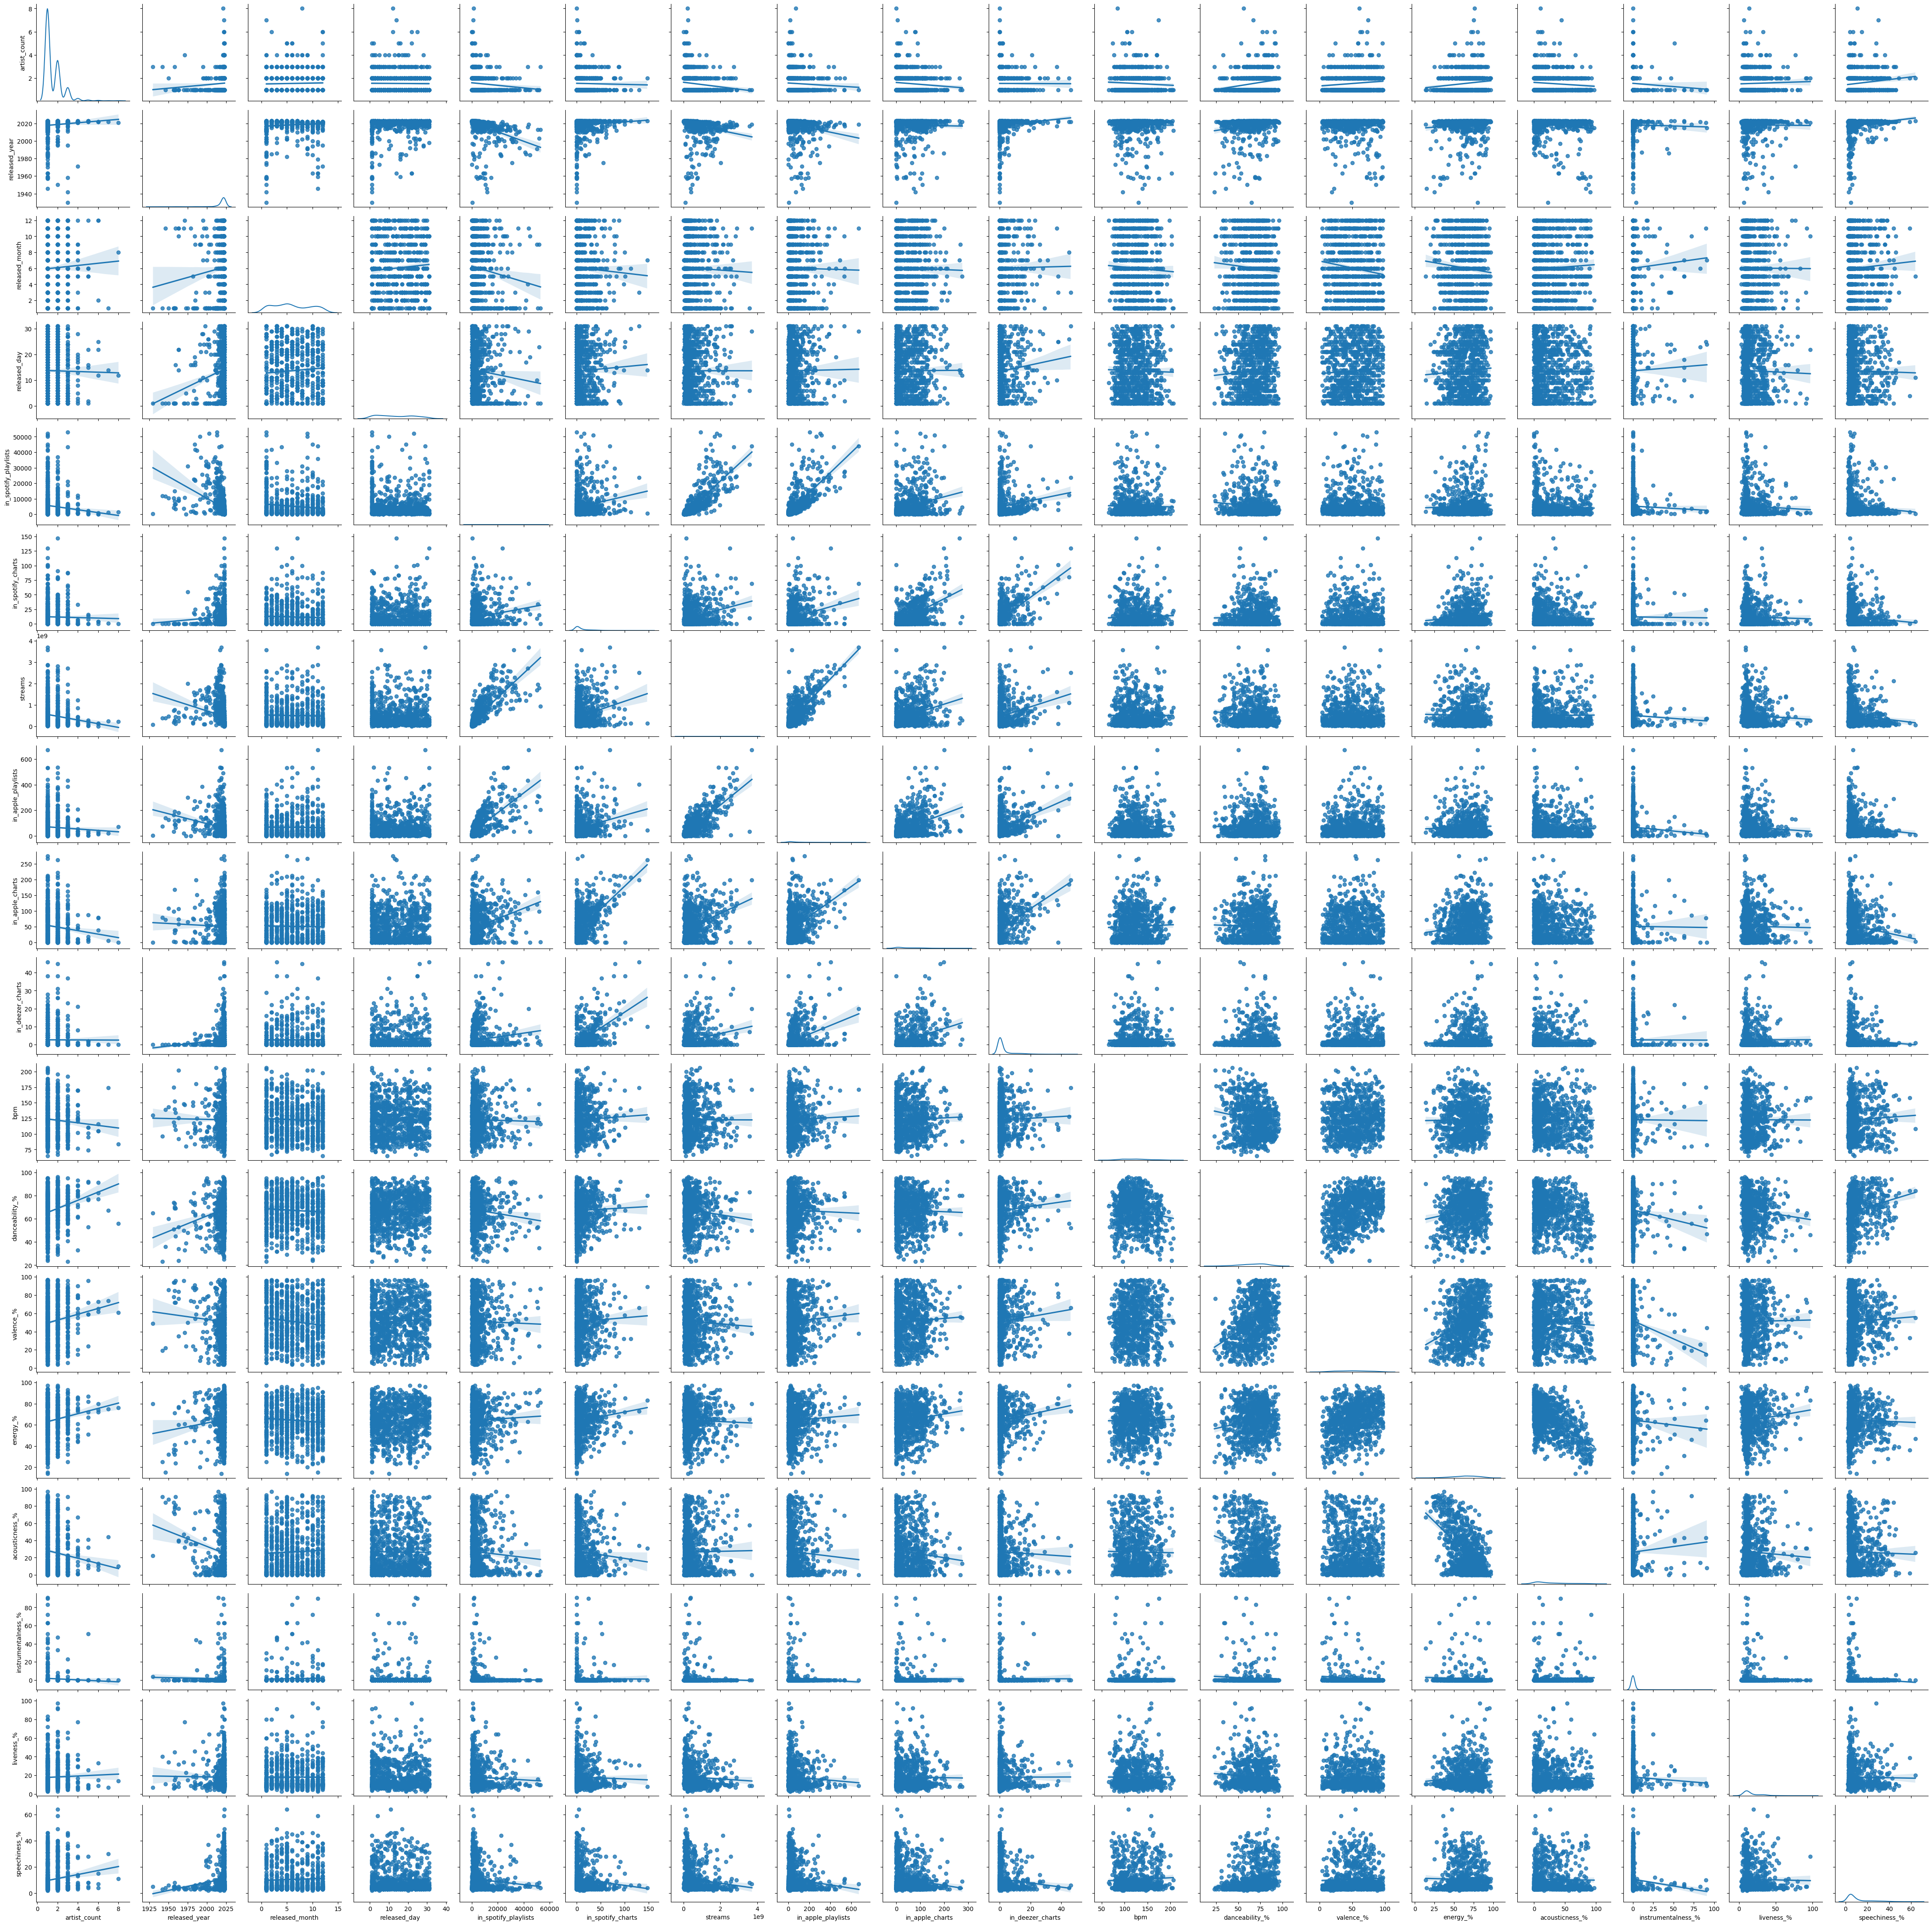

In [203]:
g = sns.PairGrid(spotifyNumericDF)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.regplot)

## Analysis of Data: Regression Tree

In [204]:
# Label encode the 'category' column
label_encoder = LabelEncoder()
spotifyDF_cleaned['key_encoded'] = label_encoder.fit_transform(spotifyDF_cleaned['key'])
# Extract features (X) and target values (y) from the dataframe
#X = spotifyDF_cleaned[['released_month', 'bpm', 'key_encoded', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']]
X = spotifyDF_cleaned[['bpm', 'key_encoded', 'danceability_%', 'energy_%', 'acousticness_%']]
y = spotifyDF_cleaned['streams']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
tree_regressor = DecisionTreeRegressor()

# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 7.334453487533889e+17


/var/folders/qx/p_nk1z1955n4bz60478z102c0000gn/T/ipykernel_23543/807284047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyDF_cleaned['key_encoded'] = label_encoder.fit_transform(spotifyDF_cleaned['key'])


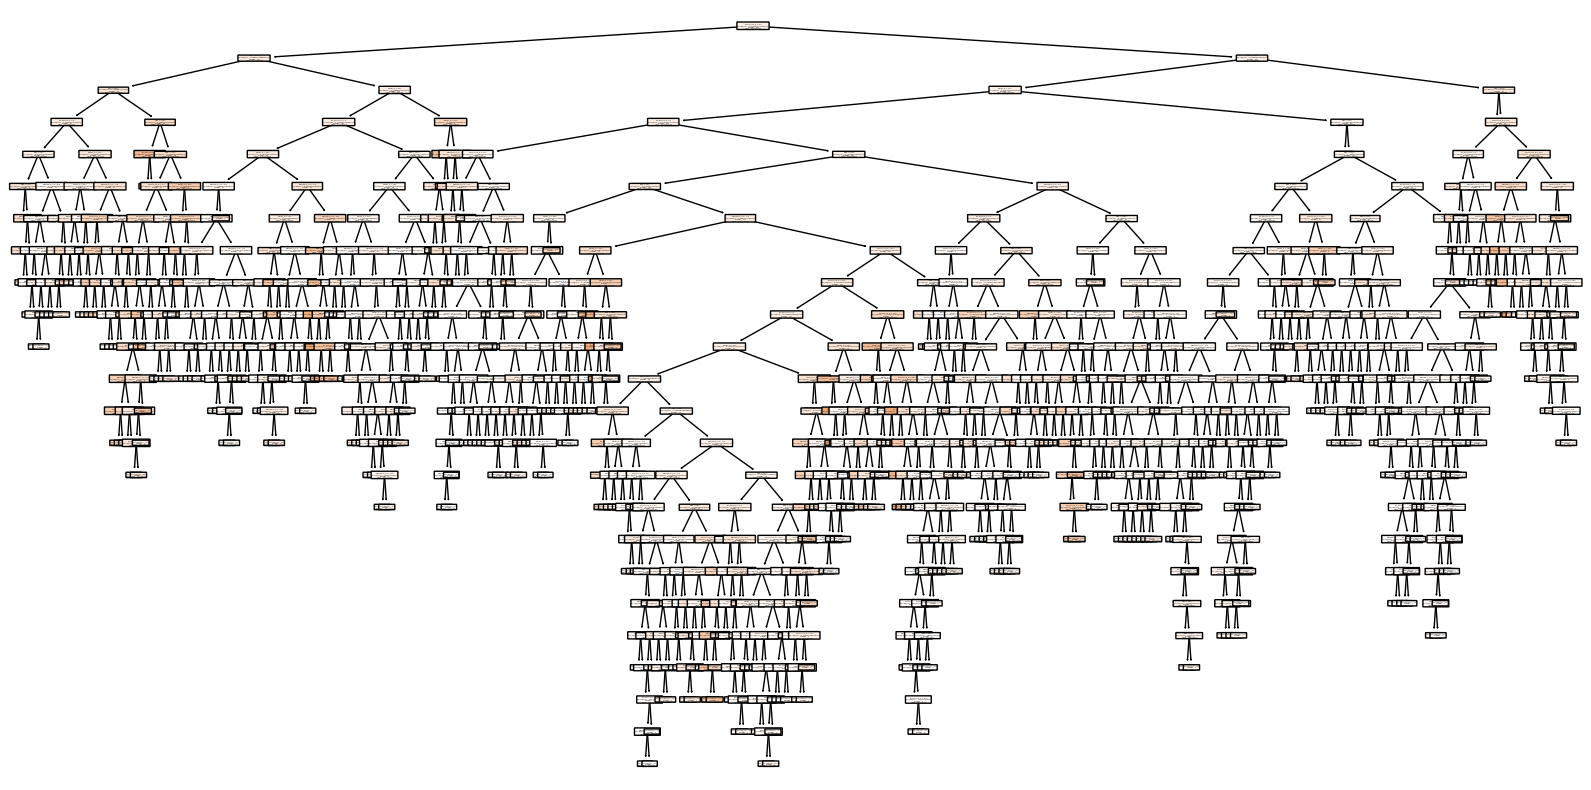

In [205]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## Combine Data frames

In [206]:
#adjust data frames to match
spotifyDF.rename(columns={'artist(s)_name': 'artists'}, inplace=True)
spotifyLargeDF.rename(columns={'artists': 'artists'}, inplace=True)
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].str.replace(';', ', ')
spotifyDF['artists'] = spotifyDF['artists'].astype(str)
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].astype(str)

In [207]:
spotifyDF.head(1)

track_name           artists  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   

   in_spotify_charts      streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703.0                  43  ...  125   B  Major   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   

   liveness_%  speechiness_%  
0           8              4  

[1 rows x 24 columns]

In [208]:
spotifyLargeDF.head(1)

Unnamed: 0                track_id      artists album_name track_name  \
0           0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy   

   popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
0          73       230666     False         0.676   0.461  ...    -6.746   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0        0.143        0.0322          0.000001     0.358    0.715   

    tempo  time_signature  track_genre  
0  87.917               4     acoustic  

[1 rows x 21 columns]

In [209]:
#Make sure there are no duplicates
print(spotifyDF.duplicated().sum())
print(spotifyLargeDF.duplicated().sum())

0
0


In [210]:
spotifyDF.isnull().sum()

track_name               0
artists                  0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [211]:
spotifyLargeDF = spotifyLargeDF.dropna(subset=['artists'])
spotifyLargeDF.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [212]:
spotifyDF.dtypes

track_name               object
artists                  object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [213]:
spotifyLargeDF.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [214]:
spotifyCombined = pd.merge(spotifyDF, spotifyLargeDF[['artists', 'track_name','track_genre', 'popularity']], on=['artists','track_name'])
#pd.merge(df1, df2[['ID', 'Score']], on='ID')

In [215]:
display(spotifyCombined)


track_name         artists  artist_count  released_year  \
0                   As It Was    Harry Styles             1           2022   
1                   As It Was    Harry Styles             1           2022   
2            I Wanna Be Yours  Arctic Monkeys             1           2013   
3            I Wanna Be Yours  Arctic Monkeys             1           2013   
4            I Wanna Be Yours  Arctic Monkeys             1           2013   
...                       ...             ...           ...            ...   
1240  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1241  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1242                Typa Girl       BLACKPINK             1           2022   
1243                Typa Girl       BLACKPINK             1           2022   
1244                Typa Girl       BLACKPINK             1           2022   

      released_month  released_day  in_spotify_playlists  in_spotify_charts  \
0                  3            31                 23575                130   
1                  3            31                 23575                130   
2                  1             1                 12859                110   
3                  1             1                 12859                110   
4                  1             1                 12859                110   
...              ...           ...                   ...                ...   
1240               7            14                  3682                  6   
1241               7            14                  3682                  6   
1242               9            16                   452                 10   
1243               9            16                   452                 10   
1244               9            16                   452                 10   

           streams  in_apple_playlists  ...   mode danceability_%  valence_%  \
0     2.513188e+09                 403  ...  Minor             52         66   
1     2.513188e+09                 403  ...  Minor             52         66   
2     1.297026e+09                  24  ...  Minor             48         44   
3     1.297026e+09                  24  ...  Minor             48         44   
4     1.297026e+09                  24  ...  Minor             48         44   
...            ...                 ...  ...    ...            ...        ...   
1240  2.476891e+08                  41  ...  Major             72         92   
1241  2.476891e+08                  41  ...  Major             72         92   
1242  2.355493e+08                   2  ...  Major             92         53   
1243  2.355493e+08                   2  ...  Major             92         53   
1244  2.355493e+08                   2  ...  Major             92         53   

     energy_%  acousticness_% instrumentalness_% liveness_%  speechiness_%  \
0          73              34                  0         31              6   
1          73              34                  0         31              6   
2          42              12                  2         11              3   
3          42              12                  2         11              3   
4          42              12                  2         11              3   
...       ...             ...                ...        ...            ...   
1240       77               9                  0          8             11   
1241       77               9                  0          8             11   
1242       62               7                  0         63             10   
1243       62               7                  0         63             10   
1244       62               7                  0         63             10   

      track_genre  popularity  
0             pop          95  
1             pop          92  
2          garage          92  
3           indie          92  
4            rock          92  
...           ...         ...  
1240      h

In [216]:
#calculate duplicates
spotifyCombined.duplicated().sum()
spotifyCombined[spotifyCombined.duplicated(subset=['artists', 'track_name'])]


track_name         artists  artist_count  released_year  \
1                   As It Was    Harry Styles             1           2022   
3            I Wanna Be Yours  Arctic Monkeys             1           2013   
4            I Wanna Be Yours  Arctic Monkeys             1           2013   
7             I Ain't Worried     OneRepublic             1           2022   
8             I Ain't Worried     OneRepublic             1           2022   
...                       ...             ...           ...            ...   
1239  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1240  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1241  2 Be Loved (Am I Ready)           Lizzo             1           2022   
1243                Typa Girl       BLACKPINK             1           2022   
1244                Typa Girl       BLACKPINK             1           2022   

      released_month  released_day  in_spotify_playlists  in_spotify_charts  \
1                  3            31                 23575                130   
3                  1             1                 12859                110   
4                  1             1                 12859                110   
7                  5            13                  8431                 76   
8                  5            13                  8431                 76   
...              ...           ...                   ...                ...   
1239               7            14                  3682                  6   
1240               7            14                  3682                  6   
1241               7            14                  3682                  6   
1243               9            16                   452                 10   
1244               9            16                   452                 10   

           streams  in_apple_playlists  ...   mode danceability_%  valence_%  \
1     2.513188e+09                 403  ...  Minor             52         66   
3     1.297026e+09                  24  ...  Minor             48         44   
4     1.297026e+09                  24  ...  Minor             48         44   
7     1.085685e+09                 241  ...  Major             71         82   
8     1.085685e+09                 241  ...  Major             71         82   
...            ...                 ...  ...    ...            ...        ...   
1239  2.476891e+08                  41  ...  Major             72         92   
1240  2.476891e+08                  41  ...  Major             72         92   
1241  2.476891e+08                  41  ...  Major             72         92   
1243  2.355493e+08                   2  ...  Major             92         53   
1244  2.355493e+08                   2  ...  Major             92         53   

     energy_%  acousticness_% instrumentalness_% liveness_%  speechiness_%  \
1          73              34                  0         31              6   
3          42              12                  2         11              3   
4          42              12                  2         11              3   
7          81              11                  0          6              5   
8          81              11                  0          6              5   
...       ...             ...                ...        ...            ...   
1239       77               9                  0          8             11   
1240       77               9                  0          8             11   
1241       77               9                  0          8             11   
1243       62               7                  0         63             10   
1244       62               7                  0         63             10   

      track_genre  popularity  
1             pop          92  
3           indie          92  
4            rock          92  
7           piano           0  
8           piano           1  
...           ...         ...  
1239      h

In [217]:
#remove duplicates
spotifyCombined = spotifyCombined.drop_duplicates(subset=['artists', 'track_name'])
spotifyCombined.duplicated().sum()

0

In [218]:
display(spotifyCombined)

track_name                 artists  artist_count  \
0                      As It Was            Harry Styles             1   
2               I Wanna Be Yours          Arctic Monkeys             1   
5                    Blank Space            Taylor Swift             1   
6                I Ain't Worried             OneRepublic             1   
20                   Die For You              The Weeknd             1   
...                          ...                     ...           ...   
1222               The Scientist                Coldplay             1   
1223                     Bye Bye  Marshmello, Juice WRLD             2   
1227  we fell in love in october             girl in red             1   
1229     2 Be Loved (Am I Ready)                   Lizzo             1   
1242                   Typa Girl               BLACKPINK             1   

      released_year  released_month  released_day  in_spotify_playlists  \
0              2022               3            31                 23575   
2              2013               1             1                 12859   
5              2014               1             1                 11434   
6              2022               5            13                  8431   
20             2016              11            24                  2483   
...             ...             ...           ...                   ...   
1222           2002               8             5                 30992   
1223           2022              10            14                   766   
1227           2018              11            21                  6858   
1229           2022               7            14                  3682   
1242           2022               9            16                   452   

      in_spotify_charts       streams  in_apple_playlists  ...   mode  \
0                   130  2.513188e+09                 403  ...  Minor   
2                   110  1.297026e+09                  24  ...  Minor   
5                    53  1.355959e+09                 154  ...  Major   
6                    76  1.085685e+09                 241  ...  Major   
20                   59  1.647990e+09                  68  ...  Minor   
...                 ...           ...                 ...  ...    ...   
1222                  6  1.608164e+09                 124  ...  Major   
1223                  0  8.469773e+07                  16  ...  Minor   
1227                  0  7.230439e+08                  31  ...  Major   
1229                  6  2.476891e+08                  41  ...  Major   
1242                 10  2.355493e+08                   2  ...  Major   

     danceability_%  valence_% energy_%  acousticness_% instrumentalness_%  \
0                52         66       73              34                  0   
2                48         44       42              12                  2   
5                75         57       68               9                  0   
6                71         82       81              11                  0   
20               59         51       52               9                  0   
...             ...        ...      ...             ...                ...   
1222             56         21       44              73                  0   
1223             65         24       53               6                  0   
1227             57         24       37              11                 18   
1229             72         92       77               9                  0   
1242             92         53       62               7                  0   

     liveness_%  speechiness_%  track_genre  popularity  
0            31              6          pop          95  
2            11              3       garage          92  
5            13              6          pop          85  
6             6              5        piano          96  
20           15              7          pop          88  
...         ...            ...          ...         ...  
1222        

In [220]:
print(spotifyCombined['track_genre'].value_counts())

track_genre
pop                  46
dance                39
hip-hop              27
k-pop                21
latin                14
latino               14
indie-pop            13
rock                  6
electro               5
alt-rock              5
piano                 5
garage                5
british               5
singer-songwriter     4
funk                  4
indie                 3
soul                  3
folk                  3
hard-rock             3
anime                 3
synth-pop             2
german                2
country               2
alternative           2
emo                   2
reggae                2
rock-n-roll           1
edm                   1
j-rock                1
grunge                1
blues                 1
indian                1
jazz                  1
rockabilly            1
disco                 1
ambient               1
chill                 1
french                1
r-n-b                 1
Name: count, dtype: int64
